In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

employee = pd.read_csv(r"../Dataset\IBM-HR-Employee-Attrition.csv")
   
employee = employee.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)
employee.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in employee.select_dtypes(include='object').columns:
    employee[col] = le.fit_transform(employee[col])

print(employee)

employee.to_csv("C:\IBMEmployees-ML\Dataset\IBM-HR-Employee-Attrition-Encoded.csv", index=False)

<>:9: SyntaxWarning: invalid escape sequence '\I'
<>:9: SyntaxWarning: invalid escape sequence '\I'
C:\Users\deepa\AppData\Local\Temp\ipykernel_1856\1918039908.py:9: SyntaxWarning: invalid escape sequence '\I'
  employee.to_csv("C:\IBMEmployees-ML\Dataset\IBM-HR-Employee-Attrition-Encoded.csv", index=False)


      Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationF

In [3]:
from sklearn.feature_selection import SelectKBest, f_classif

x = employee.drop('Attrition', axis=1)
y = employee['Attrition']

selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(x, y)
selected_features = x.columns[selector.get_support()]
print("Top 10 Features:\n", selected_features)

Top 10 Features:
 Index(['Age', 'JobLevel', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regrssion' : LogisticRegression(max_iter=1000),
    'Random Forest Classifier' : RandomForestClassifier(random_state=42),
    'SVC' : SVC(probability=True),
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"Model: {name}")
    print("Accuracy:", (accuracy_score(y_test, y_pred)*100),"%")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

c:\Users\deepa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regrssion
Accuracy: 87.07482993197279 %
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      0.83       294

Confusion Matrix:
 [[252   3]
 [ 35   4]]


Model: Random Forest Classifier
Accuracy: 87.07482993197279 %
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      0.83       294

Confusion Matrix:
 [[252   3]
 [ 35   4]]


Model: SVC
Accuracy: 86.73469387755102 %
Classification Report:
               precision    

c:\Users\deepa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\deepa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\deepa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

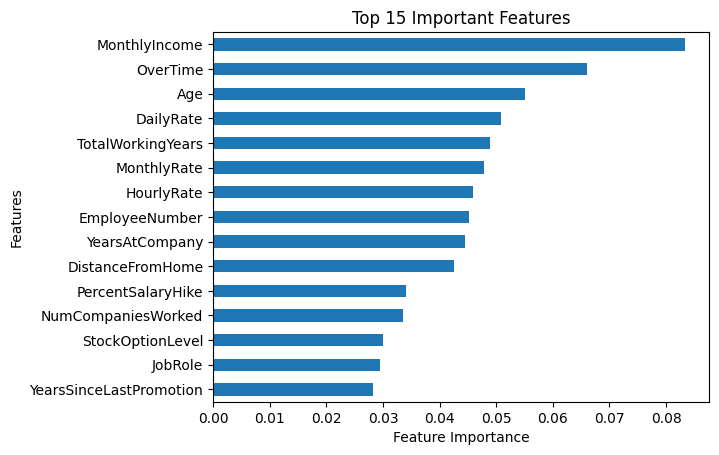

In [5]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

importances = pd.Series(rf.feature_importances_, index=x.columns)
top15 = importances.sort_values(ascending=True).tail(15)

top15.plot(kind= 'barh')
plt.title("Top 15 Important Features")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()


In [6]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_res.value_counts())

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(x_train, y_train)

Before SMOTE: Attrition
0    978
1    198
Name: count, dtype: int64
After SMOTE: Attrition
0    978
1    978
Name: count, dtype: int64


RandomForestClassifier(class_weight='balanced', random_state=42)